# Simulating Longitudinal Magnetization Exchanges

In [3]:
# Program initialisation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from Spineq import Eq, NMR, SpinSys, Rates

### 1. Simulating a two spin system

The following script simulates the time evolution of the magnetization within a two spin system under a continuous irradiation of one of the two spins. The magnetization transfers are described using a relaxation matrix shown below :

$ R = \begin{pmatrix}
   R_1 & \sigma \\
   \sigma & R_1 
\end{pmatrix}
$

In this case, one can easely show that the S1 spin magnetization reaches an equilibrium value. The corresponding NOE (the relative difference of the peak intensity) is given by :

$ NOE_{max} = \frac{I - I_0}{I_0} = \frac{\sigma}{R_1}$
                 
- Check the expression above by changing the values of $\sigma$ and $R_1$


- From $\sigma$ and $R_1$, identify the rate that defines the time needed to reach equilibrium ?



Kinetics

mass conservation rules

concentrations
esp0 : 	 1.000 M

Spin Systems
2 spin(s)  - Relax matrix : 
[[ 1.  -0.2]
 [-0.2  1. ]]
equilibrium magnetizations : [[1. 1.]]
initial magnetizations : [0. 1.]
Total of 2 spins
the following spins are saturated : [0]
spin fluxes:
 [[0. 0.]
 [0. 0.]]


<IPython.core.display.Javascript object>


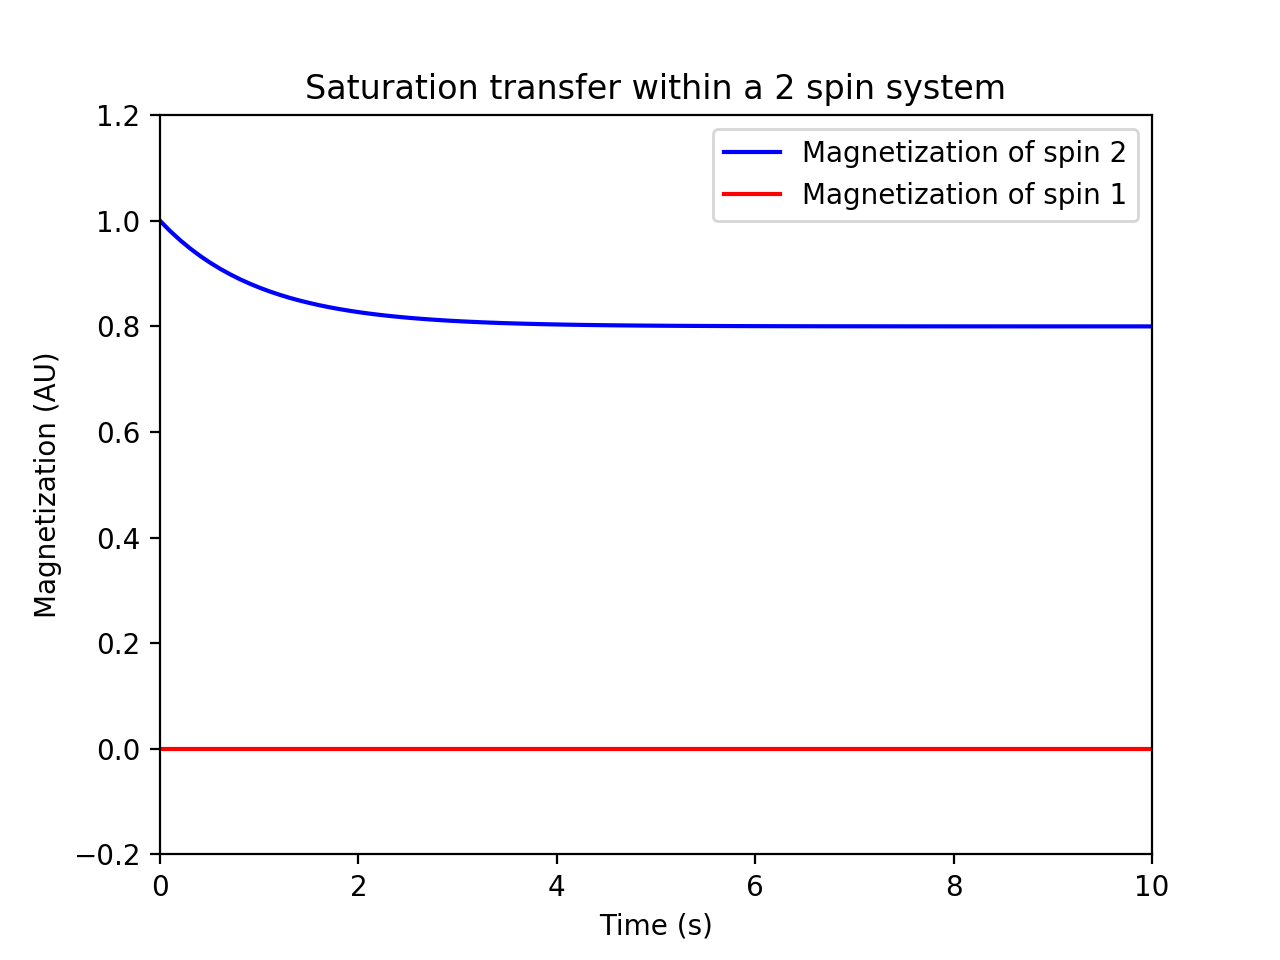

In [4]:
# Define a spin system with a one molecule (first parameter) and two spins (second parameter)
eq1 = NMR(1,2)
# Relaxation rate values (in 1/second)
R1E = 1.0
sigma = -0.2
# The relaxation matrix
Relax = np.matrix([[R1E,sigma],[sigma,R1E]])
# Define a two spin system, 0 corresponds to the spin system Identification number
eq1.set_spin(0, SpinSys(2,Relax))
# We saturate one spin (Id 0) of the spin system 0 throughout the experiment
# Note: The equilibrium magnetization is set to 1
eq1.saturate(0, 0)
# Report the system's status 
eq1.report()
# Numerical integration over 10 sec, witht rajectory sampling (100 points)
(t,res) = eq1.solve(maxtime=10.0, step=100, trajectory=True)

# Graphic rendering
plt.plot(t, [r[2] for r in res ], '-b', label="Magnetization of spin 2")
plt.plot(t, [r[1] for r in res ], '-r', label="Magnetization of spin 1")
plt.axis([0., 10., -0.2, 1.2])
plt.title("Saturation transfer within a 2 spin system")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Magnetization (AU)")
plt.show()


### Exercice 1 : 

Modify the script to simulate a selective T1 experiment where S0 spin magnetization is inverted at the beginning of the sequence. To achieve this, you will replace the command eq1.saturate (0,0) by eq1.set_magnetization (-1.0, 0, 0).

- Compare the relaxation rates of the inverted spin (S0) in the case of a selective and non-selective inversion (both spins are inverted). We will set identical longitudinal relaxation rates R1 for the two spins: R1 = 1.0 s-1 and σ = -0.6 s-1.

- How to explain the difference observed between the two relaxation processes?

- What is the interest of a selective inversion?

- Do you know about NMR experiments that take advantage of this phenomenon?



# 2. Spin diffusion

The successive transfer of magnetization from one spin to its neighbours is called spin diffusion. The diffusion depends on the topology of the spin system as well as on the sign and efficiency of the cross-relaxation rate. The Rates module allows the computation of the cross-relaxation rates for various situations.

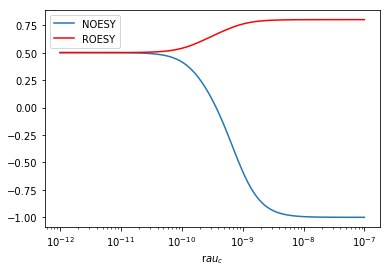

In [18]:
# Initialization of the module calculating the cross relaxation rates
a = Rates(field = 11.4)
# Create a list of correlation time values from 10^-12 to 10^-7 seconds
tauc = np.logspace(-12,-7,100)
# Computes the cross-relaxation rates and longitudinal relaxation rates in the laboratory frame
(sigma,rho) = a.calc_sigma(tc=tauc,r=2.5e-10)
# Computes the cross-relaxation rates and longitudinal relaxation rates in the rotating frame (for transverse magnetization)
(lmd,mu) = a.calc_sigma(tc=tauc,r=2.5e-10,teta=np.pi/2)
# Computes the maximal values of the NOE
noe_max = sigma/rho
roe_max = lmd/mu
plt.semilogx(tauc,noe_max, label="NOESY")
plt.semilogx(tauc,roe_max,'-r',label="ROESY")
plt.legend()
plt.xlabel('r$\tau_c$')
plt.show()

Using the script above, find the answers of the following questions:

- If the longitudinal cross-relaxation rate is null for a field of 11.4T, what will be its value at 16T?

- Is it possible to change another parameter than the field to get a negative longitudinal cross-relaxation rate?

Using the script below, find the answers of the following questions:

- Write the relaxation matrix that corresponds to the following topology of a four spin systems 


 
- Describe the spin diffusion process for such a topology for a molecule with a tumbling time of 10 ns, in a magnetic field of 11.4T for a NOESY and a ROESY experiments. Comment on the consequences of the observation on the interpretation of NOE values for structural analysis.


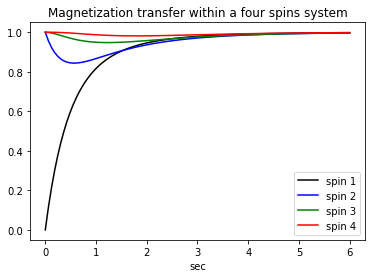

In [16]:
# Define a spin system with a one molecule (first parameter) and four spins (second parameter)
eq1 = NMR(1,4)
# Relaxation rate values (in 1/second)
R1S = 2.0
sigma = -0.8
# Defining the relaxation matrix
Relax = np.matrix([[R1S,sigma,0.0,0.0],
                   [sigma,R1S,sigma,0.0],
                   [0.0,sigma,R1S,sigma],
                   [0.0,0.0,sigma,R1S]])

# Define a two spin system, 0 corresponds to the spin system Identification number
eq1.set_spin(0, SpinSys(4,Relax))
# The Magnetization of the first spin is set to zero at the beginning of the experiment
eq1.set_magnetization(0.0,0, 0)

# Numerical integration over 6 sec, witht rajectory sampling (100 points)
(t,res1) = eq1.solve(maxtime=6.0, step=100, trajectory=True) #,verbose=True)

# Plots of Magnetization states of the four spins
plt.plot(t, [r[1] for r in res1 ], '-k', label="spin 1")
plt.plot(t, [r[2] for r in res1 ], '-b', label="spin 2")
plt.plot(t, [r[3] for r in res1 ], '-g', label="spin 3")
plt.plot(t, [r[4] for r in res1 ], '-r', label="spin 4")

#plt.axis([0., 10., -0.2, 1.2])
plt.title("Magnetization transfer within a four spins system")
plt.xlabel('sec')
plt.legend()
plt.show()